# **STATISTICAL (DESCRIPTIVE AND PREDICTIVE) ANALYSIS OF HEALTHCONNECT DATASET** 

#### The objective is to analyze the organization’s patient database to discover trends and insights.  
The company is interested in identifying common health issues, treatment outcomes,   
and geographical distribution of diseases to better tailor its services.   

#### **Importing Dataset** 

In [4]:
## I will start with importing pandas, a powerful open_source library in Python for data manipulation and analysis
import pandas as pd

In [5]:
## importing healthconnect dataset to be read by panda
file ='C:/Users/USER/Desktop/3mtt capstone data/3mtt capstone data.csv'
data= pd.read_csv (file)

#### **Cleaning Dataset**

In [7]:
## Checking for missing values
data.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [8]:
## Checking for duplicate values
data.duplicated().sum()

534

In [9]:
## Checking for the details of duplicate values
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
55495    False
55496    False
55497    False
55498    False
55499    False
Length: 55500, dtype: bool

In [10]:
## Dropping the duplicate values
data.drop_duplicates()
data=data.drop_duplicates()

In [11]:
## confirming duplicate values have been successfully removed
data.duplicated().sum()

0

In [12]:
## Getting the information on the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


In [13]:
## calling for the first five rows to have a view of what the dataframe looks like and its attributes
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


#### **Preprocessing Data**

In [15]:
## Formating the datatype to compatible format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])

In [16]:
## Formating the datatype to compatible format
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

In [17]:
##create a new column to extract the duration spent at the hospital
data['Duration']=(data['Discharge Date'] - data['Date of Admission']).dt.days

In [18]:
## Statistical description of the data frame
data.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Duration
count,54966.000000,54966,54966.000000,54966.000000,54966,54966.000000
mean,51.535185,2021-11-01 17:35:29.505512448,25544.306284,301.124404,2021-11-17 05:34:28.202161408,15.499290
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00,1.000000
25%,35.000000,2020-07-28 00:00:00,13243.718641,202.000000,2020-08-13 00:00:00,8.000000
50%,52.000000,2021-11-02 00:00:00,25542.749145,302.000000,2021-11-18 00:00:00,15.000000
75%,68.000000,2023-02-03 00:00:00,37819.858159,401.000000,2023-02-19 00:00:00,23.000000
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00,30.000000
std,19.605661,NaN,14208.409711,115.223143,NaN,8.661471


### **EXPLORATORY DATA ANALYSIS** 



In [20]:
## Importing libraries for Exploratory Analysis and Visualizations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
## EDA 1
## Analysing for the most common diagnosis by Count
Diagnosis_Count= data['Medical Condition'].value_counts()
Diagnosis_Count

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

**Insights from EDA 1: Arthritis is the most common medical condition with 9218, followed by Diabetes with 9216, and 
Hypertension 9151. The number of medical conditions is close to one another with everything ranging from 9095 to 9218**   

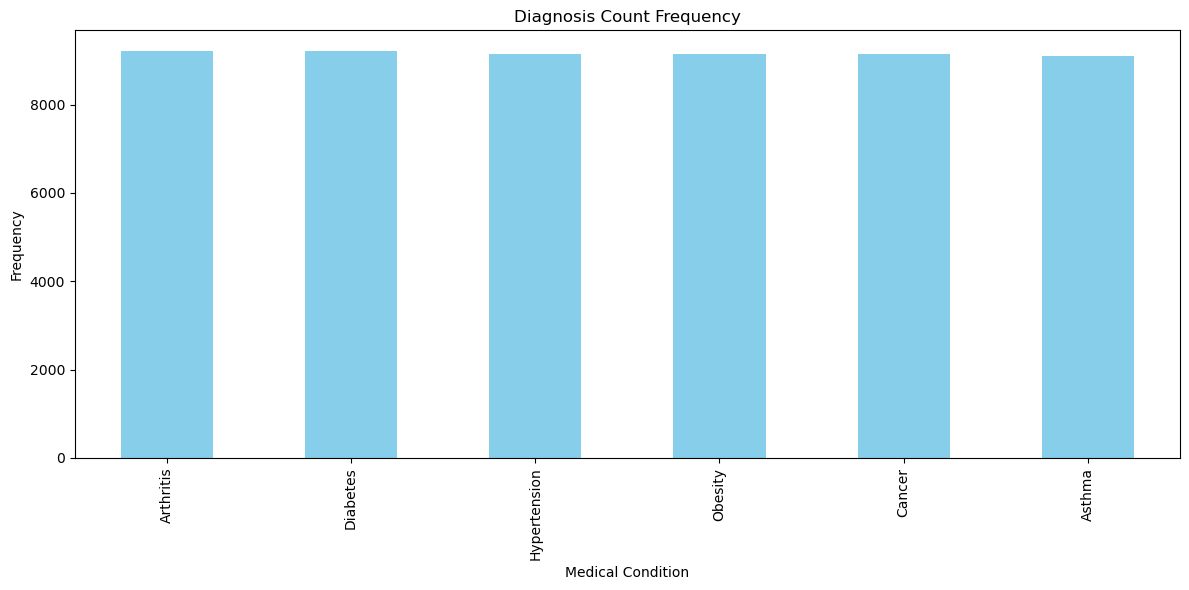

In [23]:
## plotting visual of the most common diagnosis
plt.figure(figsize=(12,6))
Diagnosis_Count.plot(kind='bar', color='skyblue')
plt.title('Diagnosis Count Frequency') 
plt.xlabel('Medical Condition')
plt.ylabel('Frequency')
plt.tight_layout ()
plt.show ()

In [24]:
##EDA 2
## Analysing for Diagnosis by region using Hospital to stand in as region
Diagnosis_by_region= data.groupby('Medical Condition')['Hospital'].value_counts()
Diagnosis_by_region

Medical Condition  Hospital                   
Arthritis          Smith PLC                      12
                   Smith LLC                      11
                   Inc Smith                       9
                   Ltd Smith                       9
                   Group Johnson                   8
                                                  ..
Obesity            and Young, Dorsey Hill          1
                   and Young, Spencer Byrd         1
                   and Zhang Brooks, Hamilton      1
                   and Zhang Underwood, Martin     1
                   and Zimmerman Sons              1
Name: count, Length: 46184, dtype: int64

**EDA 2 Insights
The Top 5 hospitals are by medical conditions and region with hospitals standing in as region 
Johnson PLC recorded 7 Arthritis, 9 Asthma,  7 cancer, 7 Diabetes, 6 hypertension and 2 obesity
Smith LLC with 8 Arthritis 4 Asthma 5 cancer 11 Diabetes 11 hypertension  and 5 obesity 11
Ltd Smith with Arthritis 9, 3 Asthma 6 cancer 4 Diabetes 6 hypertension 11 obesity
Smith Group 6 Arthritis 2 Asthma 10 cancer 4 Diabetes 2 hypertension 10 obesity
Smith Ltd with 7 Arthritis 5 Asthma 6 cancer 7 Diabetes 8 hypertension 7 obesity**


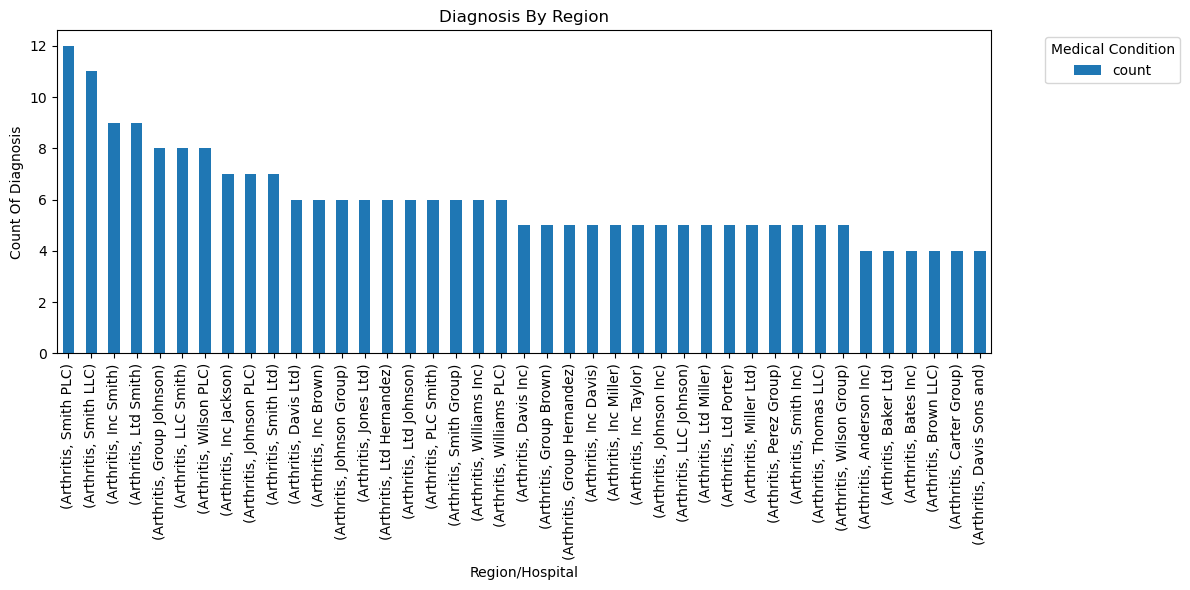

In [26]:
## plotting visual of Diagnosis By Region
plt.figure(figsize=(12,6))
Diagnosis_by_region[:41].plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Diagnosis By Region') 
plt.xlabel('Region/Hospital')
plt.ylabel('Count Of Diagnosis')
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
## EDA 3
## SUCCESS RATE OF THE TREATMENT PLANS
Treatment_plans_success_rate= data.groupby('Test Results')['Medication'].value_counts()
Treatment_plans_success_rate

Test Results  Medication 
Abnormal      Ibuprofen      3711
              Aspirin        3700
              Paracetamol    3695
              Lipitor        3670
              Penicillin     3661
Inconclusive  Lipitor        3720
              Paracetamol    3646
              Penicillin     3631
              Ibuprofen      3613
              Aspirin        3588
Normal        Ibuprofen      3699
              Aspirin        3696
              Penicillin     3664
              Lipitor        3648
              Paracetamol    3624
Name: count, dtype: int64

**EDA 3 Insight
The normal, Abnormal, and Inconclusive report of each medication was recorded. The total Normal test result recorded was
18,517, the total abnormal test results was 18,267, and the total inclusive test result was 18,357. There is no large difference recorded.** 


In [29]:
Treatment_plans_success_rate2 = data.groupby('Test Results')['Medication'].value_counts().unstack()
Treatment_plans_success_rate2

Medication,Aspirin,Ibuprofen,Lipitor,Paracetamol,Penicillin
Test Results,,,,,
Abnormal,3700,3711,3670,3695,3661
Inconclusive,3588,3613,3720,3646,3631
Normal,3696,3699,3648,3624,3664


<Figure size 1200x600 with 0 Axes>

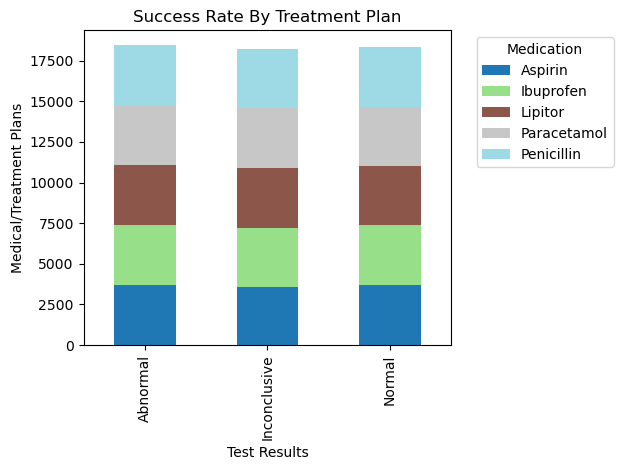

In [30]:
plt.figure(figsize=(12,6))
Treatment_plans_success_rate2.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Success Rate By Treatment Plan') 
plt.xlabel('Test Results')
plt.ylabel('Medical/Treatment Plans')
plt.legend(title='Medication', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
## EDA 4
## Medical Condition by Age
Medical_Condition_By_Age = data.groupby('Medical Condition')['Age'].value_counts().unstack()
Medical_Condition_By_Age

Age,13,14,15,16,17,18,19,20,21,22,...,80,81,82,83,84,85,86,87,88,89
Medical Condition,,,,,,,,,,,,,,,,,,,,,
Arthritis,2.0,4.0,2.0,3.0,10.0,128.0,147.0,130.0,128.0,133.0,...,142.0,153.0,143.0,112.0,117.0,135.0,12.0,3.0,5.0,2.0
Asthma,3.0,3.0,8.0,3.0,3.0,130.0,126.0,126.0,130.0,134.0,...,148.0,141.0,140.0,138.0,117.0,128.0,4.0,3.0,4.0,1.0
Cancer,2.0,2.0,5.0,5.0,7.0,125.0,136.0,134.0,133.0,126.0,...,151.0,145.0,125.0,132.0,139.0,119.0,3.0,3.0,3.0,1.0
Diabetes,NaN,2.0,6.0,4.0,4.0,124.0,130.0,125.0,130.0,135.0,...,143.0,131.0,123.0,133.0,121.0,108.0,5.0,10.0,4.0,1.0
Hypertension,1.0,1.0,2.0,4.0,3.0,132.0,134.0,108.0,164.0,133.0,...,137.0,115.0,134.0,131.0,132.0,133.0,10.0,6.0,7.0,2.0
Obesity,6.0,6.0,5.0,5.0,5.0,131.0,118.0,121.0,132.0,149.0,...,134.0,123.0,126.0,139.0,146.0,111.0,7.0,6.0,2.0,1.0


**EDA 4 Insight
The medical condition table is based on the count of medical conditions by patient's age. The first row shows 2 arthritis recorded for age 13, 4 for age 14, 2 for age 15, 3 for age 16, and so on. it is the distribution of medical conditions and medical condition count by age.** 

<Figure size 2000x1000 with 0 Axes>

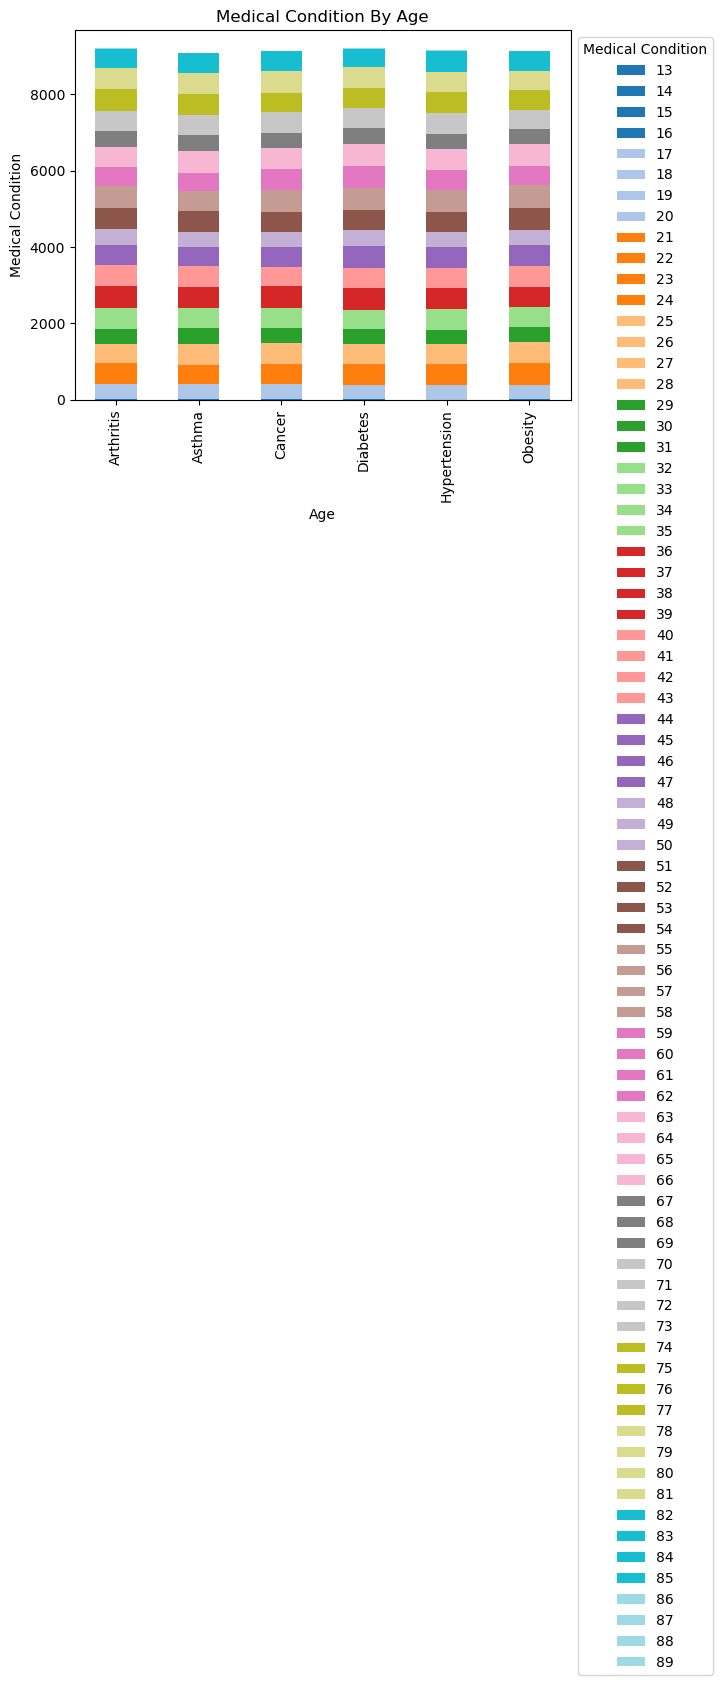

In [33]:
## creating visual for Medical Condition by Age
plt.figure(figsize=(20,10))
Medical_Condition_By_Age[:40].plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Medical Condition By Age') 
plt.xlabel('Age')
plt.ylabel('Medical Condition')
plt.legend(title='Medical Condition', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [34]:
## EDA 5
## Medical Condition By Gender
Medical_Condition_By_Gender = data.groupby('Medical Condition')['Gender'].value_counts().unstack()
Medical_Condition_By_Gender

Gender,Female,Male
Medical Condition,,
Arthritis,4642,4576
Asthma,4511,4584
Cancer,4566,4574
Diabetes,4609,4607
Hypertension,4569,4582
Obesity,4573,4573


**EDA 5 Insight
This table shows each medical condition by gender. arthritis for females is 4642 and 4576 for males
Asthma is 4522 for females and 4584 for males. In total female patients were 27,726 and males 27,774.**

<Figure size 1200x600 with 0 Axes>

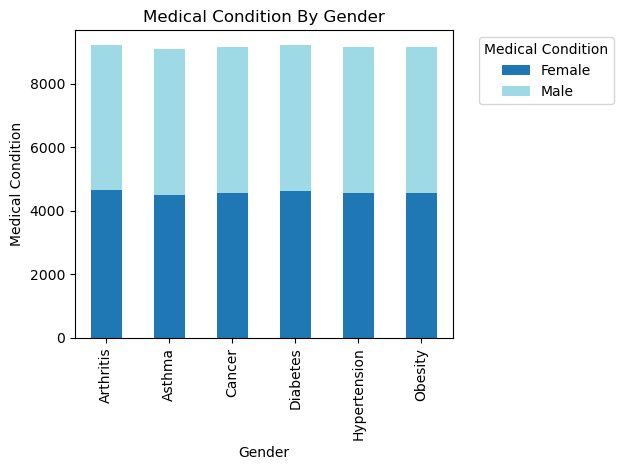

In [36]:
plt.figure(figsize=(12,6))
Medical_Condition_By_Gender.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Medical Condition By Gender') 
plt.xlabel('Gender')
plt.ylabel('Medical Condition')
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **PREDICTIVE ANALYSIS**

In [38]:
## Importing libraries to perform predictive analysis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
## Checking columns to work with
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Duration'],
      dtype='object')

In [40]:
## checking for data frame info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object        


In [41]:
##drop unnecessary features (columns)
data=data.drop(columns=['Name', 'Date of Admission', 'Doctor', 'Discharge Date', 'Doctor', 'Hospital','Billing Amount'])
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Room Number,Admission Type,Medication,Test Results,Duration
0,30,Male,B-,Cancer,Blue Cross,328,Urgent,Paracetamol,Normal,2
1,62,Male,A+,Obesity,Medicare,265,Emergency,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,Aetna,205,Emergency,Aspirin,Normal,15
3,28,Female,O+,Diabetes,Medicare,450,Elective,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,Aetna,458,Urgent,Penicillin,Abnormal,20


In [42]:
##transform categorical features into numerical using label encoder
encoder = LabelEncoder()
categorical_features= ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
for features in categorical_features:
    data[features]=encoder.fit_transform(data[features])

In [43]:
## confirming categorical features have been converted into numerical
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Room Number,Admission Type,Medication,Test Results,Duration
0,30,1,5,2,1,328,2,3,2,2
1,62,1,0,5,3,265,1,1,1,6
2,76,0,1,5,0,205,1,0,2,15
3,28,0,6,3,3,450,0,1,0,30
4,43,0,2,2,0,458,2,4,0,20


In [44]:
##define independentt variable x and dependent variable y
X = data.drop(columns=['Test Results'])
y = data['Test Results']


##split data into train and test samples
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)


scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
##define regression model
model=LinearRegression()


##apply model on training sample
model.fit(X_train_scaled, y_train)

##make predictions on test samples
y_predict=model.predict(X_test_scaled)

In [46]:
##evaluate model performance
print('model_RLSE =>', mean_squared_error(y_test, y_predict, squared=False))
print('r2 score =>', r2_score(y_test, y_predict))

model_RLSE => 0.8156109405290196
r2 score => -0.0002768379440276636


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Predictive Analysis Report
This 0.8117 RMSE suggests that the linear regression model is a good fit for the data, with about 81.57% of the variation
in the dependent variable explained by the model.
R2 score of -0.0003 is a low R-squared value, indicating that the model is not predicting the dependent variable well. this could be a result of overfitting the training data, resulting in a high Model_RLSE value. it could also be a result of data leakage between the training and the test sets and lastly, the RLSE model might not be the best model for the data.**

In [48]:
data.to_csv('data.csv',index = False)